<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Mini Project</p><br>

This is my jupyter notebook for the mini project

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [51]:
import matplotlib.pyplot as plt

## Import dataset

Import the IMDB Dataset

In [3]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
tags = pd.read_csv('./movielens/tags.csv', sep=',')
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')

In [8]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [13]:
tags.isnull().any()

userId         False
movieId        False
tag             True
timestamp      False
parsed_time    False
dtype: bool

In [15]:
tags = tags.dropna()

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [12]:
ratings.head()

,userId,movieId,rating,timestamp,parsed_time
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


## Data analysis

### average movie rating

In [17]:
avg_ratings = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [18]:
movies_avg_ratings = movies.merge(avg_ratings, on='movieId', how='left')
movies_avg_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


### add movie year

In [46]:
movies_avg_ratings['year'] = movies_avg_ratings['title'].str.extract('(\(\d{4}\))', expand=False).str[1:5]
movies_avg_ratings = movies_avg_ratings.dropna()
movies_avg_ratings['year'] = movies_avg_ratings['year'].astype(int)
movies_avg_ratings.head()

,movieId,title,genres,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,1995
4,5,Father of the Bride Part II (1995),Comedy,3.064592,1995


### average rating per year

In [54]:
avg_year_rating = movies_avg_ratings[['year', 'rating']].groupby('year', as_index=False).mean()
avg_year_rating.head()

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036


## plot

<Container object of 118 artists>

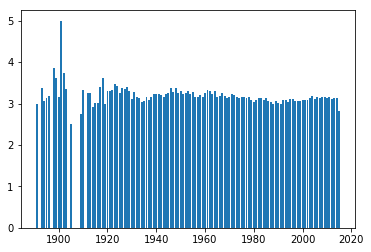

In [55]:
%matplotlib inline

years = avg_year_rating['year'].values
ratings = avg_year_rating['rating'].values

plt.bar(years, ratings)

relative stable
what about genres animation and adventure

In [63]:
is_animation = movies_avg_ratings['genres'].str.contains('Animation')
is_adventure = movies_avg_ratings['genres'].str.contains('Adventure')

movies_avg_ratings['animation_rating'] = movies_avg_ratings['rating'][is_animation]
movies_avg_ratings['adventure_rating'] = movies_avg_ratings['rating'][is_adventure]

In [64]:
movies_avg_ratings.head()

,movieId,title,genres,rating,year,is_animation,is_adventure,animation_rating,adventure_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1995,True,True,3.92124,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1995,False,True,NaN,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,1995,False,False,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,1995,False,False,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,3.064592,1995,False,False,NaN,NaN


In [67]:
avg_year_rating = movies_avg_ratings[['year','rating', 'animation_rating', 'adventure_rating']].groupby('year', as_index=False).mean()


In [68]:
avg_year_rating.head()

,year,rating,animation_rating,adventure_rating
0,1891,3.000000,NaN,NaN
1,1893,3.375000,NaN,NaN
2,1894,3.071429,NaN,NaN
3,1895,3.125000,NaN,NaN
4,1896,3.183036,NaN,NaN


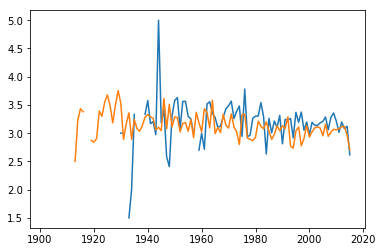

In [72]:
years = avg_year_rating['year'].values
ratings = avg_year_rating['rating'].values
animation = avg_year_rating['animation_rating'].values
adventure = avg_year_rating['adventure_rating'].values

plt.plot(years, animation, years, adventure)

In [74]:
movies_avg_ratings.pivot(index='year', columns='genres', values='rating')

ValueError: Index contains duplicate entries, cannot reshape